# Linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn



## Data

In [2]:
true_b = 1
true_w = 2
N = 100

# Data Generation
torch.manual_seed(42)
x = torch.rand(N)
epsilon = (0.1 * torch.randn(N))
y = true_b + true_w * x + epsilon

# Plot

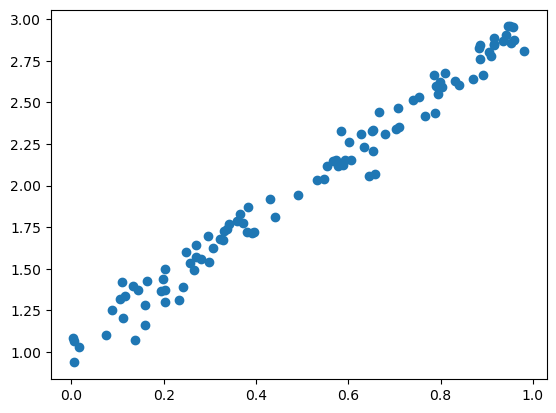

In [3]:
plt.scatter(x, y)

In [4]:

model = nn.Sequential(nn.Linear(1, 1))

lr = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.MSELoss(reduction='mean')

In [5]:
x_train_tensor = x.view(N, 1)
y_train_tensor = y.view(N, 1)

n_epochs = 100

losses = []
ws, bs = [], []
w_grads, b_grads = [], []



for epoch in range(n_epochs):
    # Sets model to TRAIN mode
    model.train()

    # Step 1 - Computes model's predicted output - forward pass
    yhat = model(x_train_tensor)

    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)
    losses.append(loss.item())

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and the learning rate
    optimizer.step()
    
    w, b = model.parameters()

    w_grads.append(w.grad.detach().clone())
    b_grads.append(b.grad.detach().clone())

    ws.append(w.data.detach().clone())
    bs.append(b.data.detach().clone())

    optimizer.zero_grad()

w_grads = torch.tensor(w_grads)
b_grads = torch.tensor(b_grads)

ws = torch.tensor(ws)
bs = torch.tensor(bs)



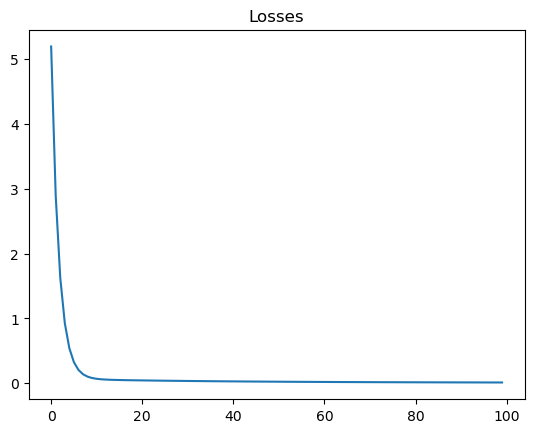

In [6]:
plt.title("Losses")
plt.plot(losses)

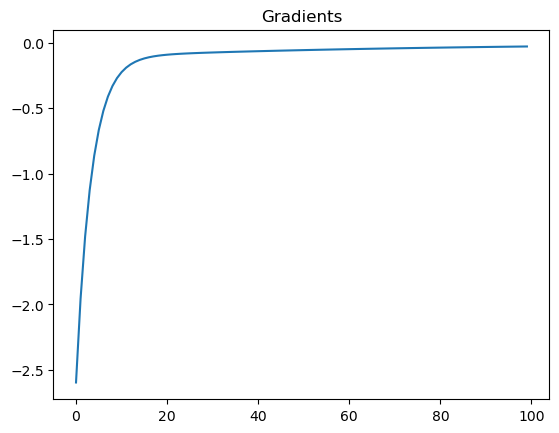

In [7]:
plt.title("Gradients")
plt.plot(w_grads)

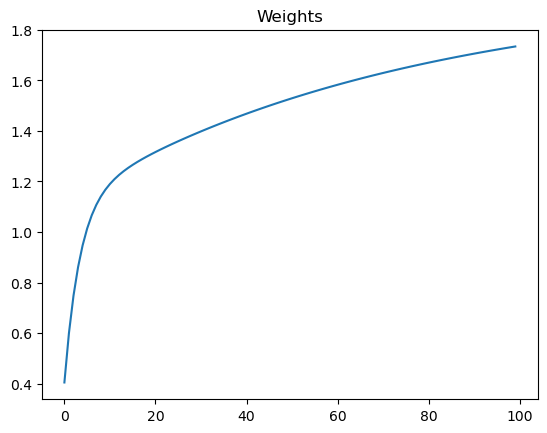

In [8]:
plt.title("Weights")
plt.plot(ws)